In [16]:
# @giomendescorrea on GitHub.
# 17 dec 2025

In [17]:
# imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
USER = os.getlogin()
ARCHIVE = fr'C:\Users\{USER}\Downloads\titanic\train.csv'

In [19]:
# import data
df_titanic = pd.read_csv(ARCHIVE, sep=',')

In [20]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1. TRATAMENTO DOS DADOS

A análise: Identifique o percentual de valores nulos em cada coluna (especialmente em "Age", "Cabin" e "Embarked").

Ação: Preencha os valores nulos da coluna "Age" com a mediana e descarte colunas com excesso de dados faltantes que não agregam valor imediato.

In [21]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
# count: Contagem - Número de valores preenchidos (não nulos).
# mean:	Média - A média aritmética dos valores.
# std:	Desvio Padrão - O quanto os dados estão "espalhados" em relação à média.
# min:	Mínimo - O menor valor encontrado na coluna.
# 25%:	1º Quartil - 25% dos dados estão abaixo deste valor.
# 50%:	Mediana - O valor central (2º Quartil).
# 75%: 3º Quartil - 75% dos dados estão abaixo deste valor.	
# max: Máximo - O maior valor encontrado na coluna.

df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
# Preencher nulos com mediana, percebe-se que média se alterou devido à inserção da mediana

df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic['Age'].mean()

C:\Users\U1043039\AppData\Local\Temp\ipykernel_22388\2589091818.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)


np.float64(29.36158249158249)

In [24]:
# Drop de colunas irrelevantes e com muitos nulos

df_titanic.drop(columns=['Cabin', 'Embarked'], inplace=True)

### 2. ANÁLISE ESTATÍSTICA

A análise: Crie um gráfico de barras comparando a taxa de sobrevivência entre os sexos e entre as diferentes classes (1ª, 2ª e 3ª).

Ação: Utilize sns.catplot ou sns.heatmap para visualizar a matriz de correlação entre as variáveis numéricas. Isso mostrará, por exemplo, se passageiros que pagaram tarifas mais altas tiveram maior chance de sobrevivência.


<Axes: xlabel='Sex'>

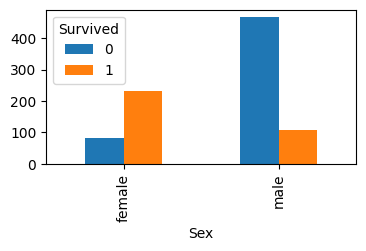

In [25]:
# 1. Comparacção de sobreviventes por sexo
pd.crosstab(df_titanic['Sex'], df_titanic['Survived']).plot(kind='bar', figsize=(4, 2))

<Axes: xlabel='Pclass'>

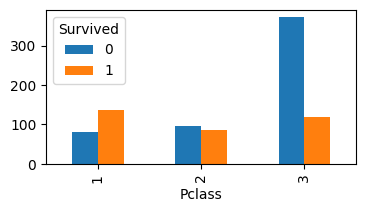

In [ ]:
# 2. Comparação de sobreviventes por classe

pd.crosstab(df_titanic['Pclass'], df_titanic['Survived']).plot(kind='bar', figsize=(4, 2))